In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(),inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].median(),inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
df=df.drop(['Unnamed: 0', 'key'],axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],utc=True)

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
plt.figure(figsize=(5,8))
plt.boxplot(df['fare_amount'])
plt.ylabel('fare')
plt.xlabel('fare_amount')
plt.title('Detecting Outliers')
plt.show()

In [13]:
def remove_outliers(df,columns):
    for col in columns:
        feature=df[col]
        q1=feature.quantile(0.25)
        q3=feature.quantile(0.75)
        IQR=q3-q1
        lower_bound=float(q1-1.5*IQR)
        upper_bound=float(q3+1.5*IQR)
        df[col]=np.where(df[col]<lower_bound, lower_bound, df[col])
        df[col]=np.where(df[col]>upper_bound, upper_bound, df[col])
    return df

In [14]:
df=remove_outliers(df,['fare_amount'])

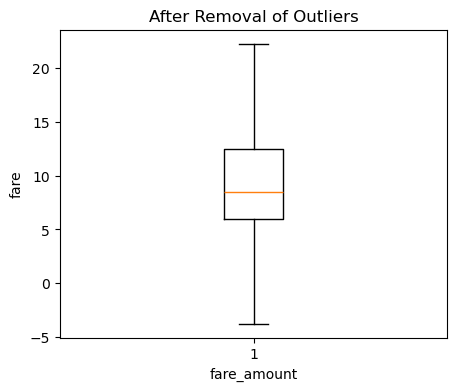

In [15]:
plt.figure(figsize=(5,4))
plt.boxplot(df['fare_amount'])
plt.ylabel('fare')
plt.xlabel('fare_amount')
plt.title('After Removal of Outliers')
plt.show()

In [16]:
df['year']=df['pickup_datetime'].dt.year
df['month']=df['pickup_datetime'].dt.month
df['date']=df['pickup_datetime'].dt.day
df['weekday']=df['pickup_datetime'].dt.weekday
df['hour']=df['pickup_datetime'].dt.hour
df['minute']=df['pickup_datetime'].dt.minute
df=df.drop(['pickup_datetime'], axis=1)

In [17]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,weekday,hour,minute
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,52
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,45
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,22
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,47


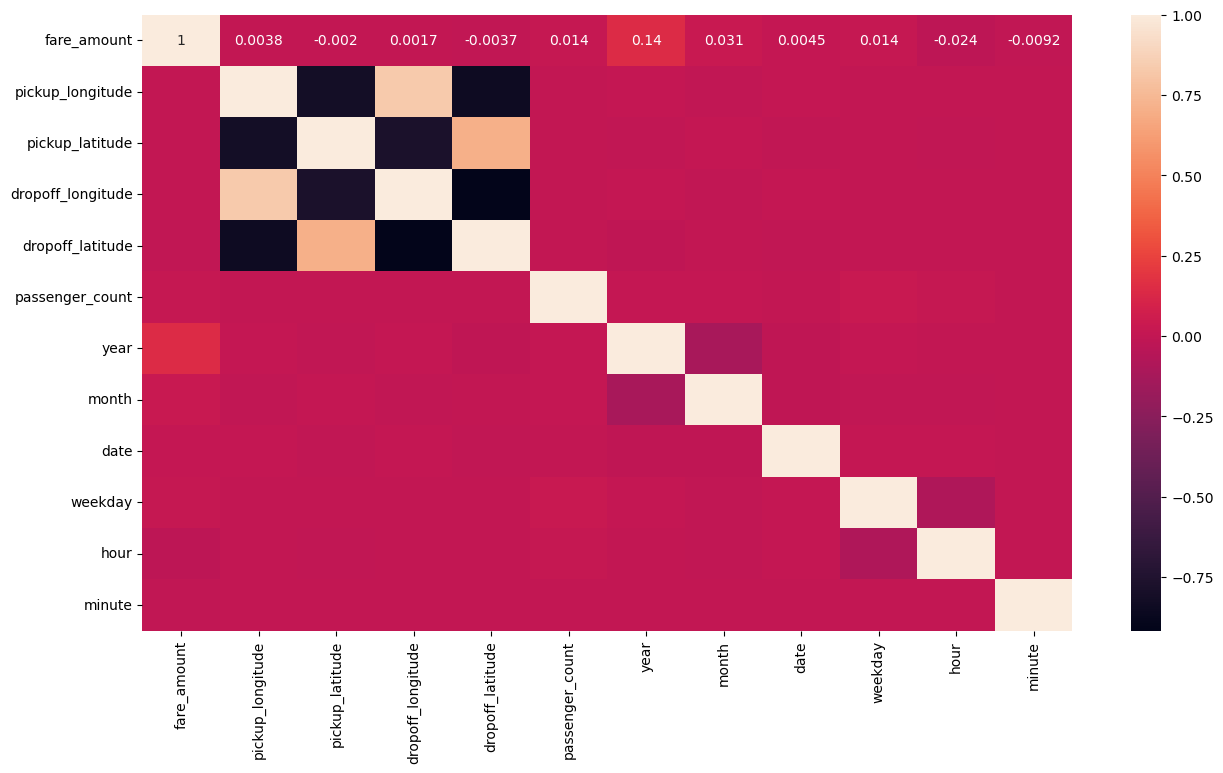

In [18]:
corr=df.corr()
plt.figure(figsize=(15,8))
co=sns.heatmap(corr,annot=True)

In [19]:
def haversine(lat1,lon1,lat2,lon2):
    lat1,lon1,lat2,lon2=map(math.radians,[lat1,lon1,lat2,lon2])
    dlat=lat2-lat1
    dlon=lon2-lon1
    a=math.sin(dlat/2)**2+math.cos(lat1)*math.cos(lat2)*math.sin(dlon/2)**2
    c=2*math.asin(math.sqrt(a))
    dist=6371*c
    return dist

In [20]:
df['distance']=df.apply(lambda row:haversine(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']), axis=1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,weekday,hour,minute,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,52,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,45,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,22,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,47,4.475450


In [21]:
X=df[['distance']]
y=df['fare_amount']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
model1=LinearRegression()
model2=RandomForestRegressor()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

model1_pred=model1.predict(X_test)
model2_pred=model2.predict(X_test)

In [ ]:
model1_r2=r2_score(y_test,model1_pred)
model2_r2=r2_score(y_test,model2_pred)
print('R2 Score of Linear Regression Model: ',model1_r2)
print('R2 Score of Random Forest Model: ',model2_r2)

In [ ]:
model1_mse=mean_squared_error(y_test,model1_pred)
model2_mse=mean_squared_error(y_test,model2_pred)
print('MSE of Linear Regression Model: ',model1_mse)
print('MSE of Random Forest Model: ',model2_mse)